Here is a simpler example of the use of LIME for image classification by using Keras (v2 or greater)

In [8]:
#!pip install lime

In [1]:
import os
import keras
import tensorflow as tf
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)


Notebook run using keras: 2.13.1


# Using Inception
Here we create a standard InceptionV3 pretrained model and use it on images by first preprocessing them with the preprocessing tools

In [2]:
inet_model = inc_net.InceptionV3()

96112376/96112376 [==============================] - 9s 0us/step


In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = tf.keras.utils.load_img(img_path, target_size=(299, 299))
        x = tf.keras.utils.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Let's see the top 5 prediction for some image

35363/35363 [==============================] - 0s 0us/step
('n02088238', 'basset', 0.9209929)
('n02088466', 'bloodhound', 0.008559517)
('n02102177', 'Welsh_springer_spaniel', 0.0015986806)
('n02089867', 'Walker_hound', 0.0012721288)
('n02514041', 'barracouta', 0.0011855554)


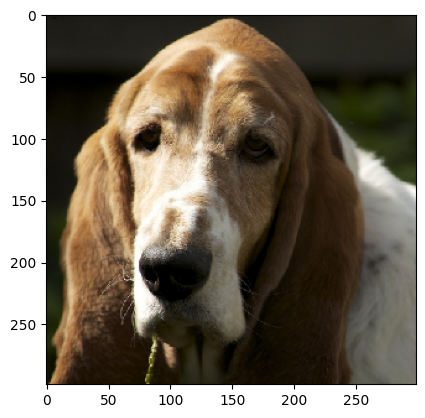

In [4]:
images = transform_img_fn([os.path.join('basset_hound_23.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)
#C:\D\jupyter projects\dogs_cats\images

In [6]:
import lime
from lime import lime_image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

In [7]:
inet_model = InceptionV3()

In [25]:
img_path = 'Egyptian_Mau_136.jpg'
img = image.load_img(img_path, target_size=(299, 299))
img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

In [26]:
def predict_fn(images):
    predictions = inet_model.predict(images)
    return predictions

In [27]:
explainer = lime_image.LimeImageExplainer()

In [29]:

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 626ms/step


In [30]:
from skimage.segmentation import mark_boundaries 

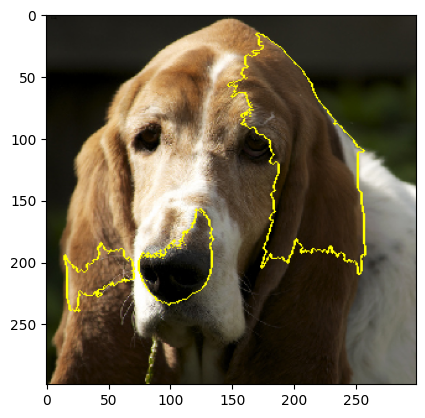

In [31]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

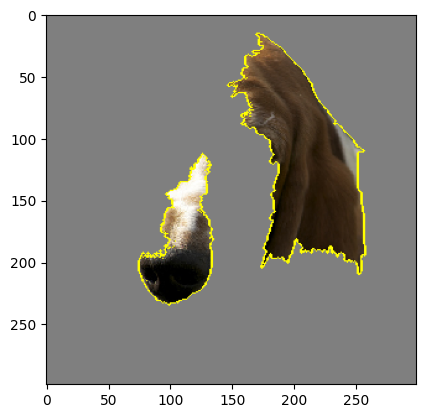

In [16]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

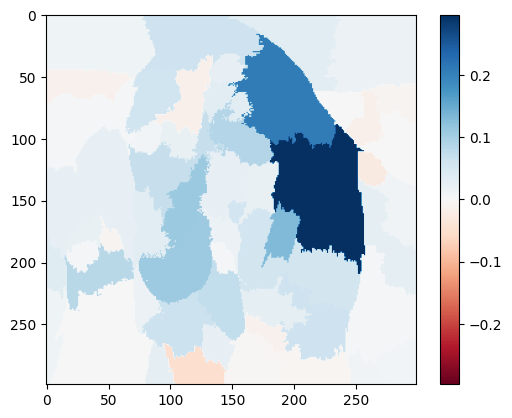

In [17]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

## Explanation
Now let's get an explanation

In [18]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [19]:
explainer = lime_image.LimeImageExplainer()

hide_color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels. Here, we set it to 0 (in the representation used by inception model, 0 means gray)

In [20]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 598ms/step
CPU times: total: 1min 2s
Wall time: 1min 13s


Image classifiers are a bit slow. Notice that an explanation on my Surface Book dGPU took 1min 12s

### Now let's see the explanation for the top class ( Black Bear)

We can see the top 5 superpixels that are most positive towards the class with the rest of the image hidden

In [21]:
from skimage.segmentation import mark_boundaries

In [23]:
img_path = 'Egyptian_Mau_136.jpg'
img = image.load_img(img_path, target_size=(299, 299))
img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

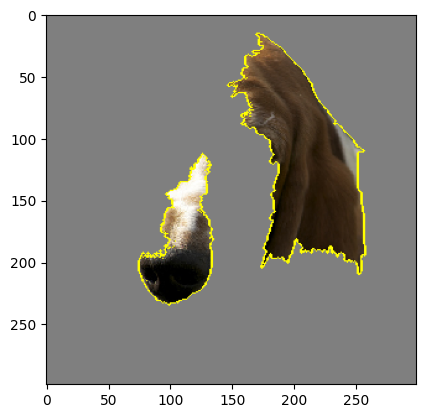

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Or with the rest of the image present:

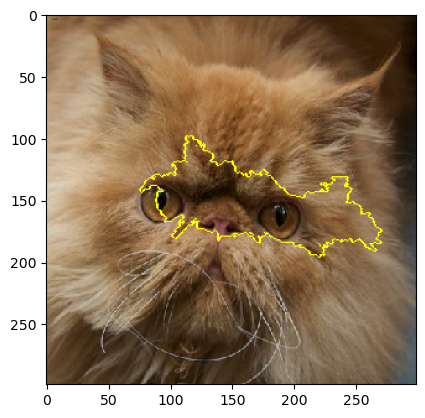

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


We can also see the 'pros and cons' (pros in green, cons in red)

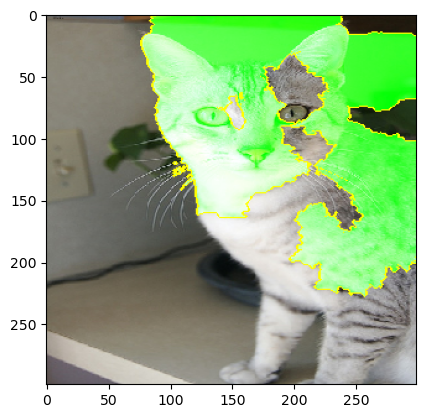

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Or the pros and cons that have weight at least 0.1

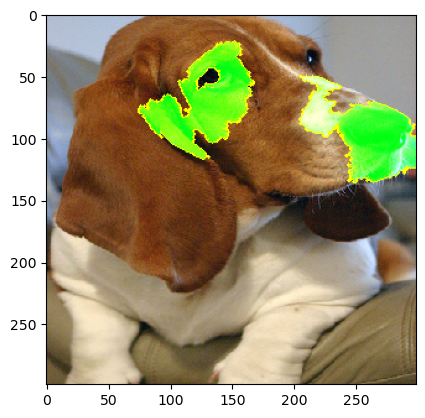

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Alternatively, we can also plot explanation weights onto a heatmap visualization. The colorbar shows the values of the weights.

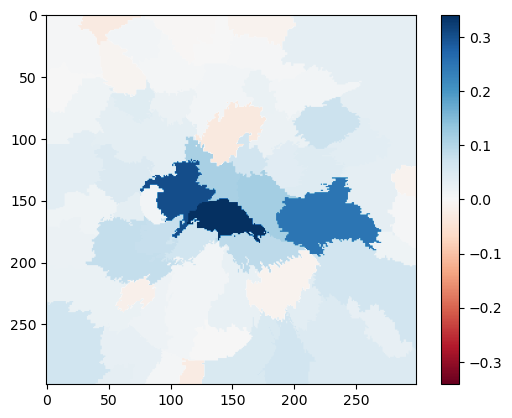

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [32]:
import lime
from lime import lime_image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from skimage.segmentation import mark_boundaries
import numpy as np
import os

In [33]:
inet_model = InceptionV3()

In [34]:
def predict_fn(images):
    predictions = inet_model.predict(images)
    return predictions

In [35]:
explainer = lime_image.LimeImageExplainer()

In [36]:
image_paths = ['basset_hound_23.jpg', 'Egyptian_Mau_136.jpg', 'newfoundland_126.jpg', 'samoyed_153.jpg', 'Siamese_228.jpg', 'staffordshire_bull_terrier_175.jpg']


In [37]:
output_dir = 'heatmaps'
os.makedirs(output_dir, exist_ok=True)

In [38]:
for img_path in image_paths:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)

In [43]:
explanation = explainer.explain_instance(img[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 614ms/step


In [40]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

In [44]:
heatmap_path = os.path.join(output_dir, f'{os.path.splitext(os.path.basename(img_path))[0]}_heatmap.png')
plt.imsave(heatmap_path, mark_boundaries(temp / 2 + 0.5, mask))

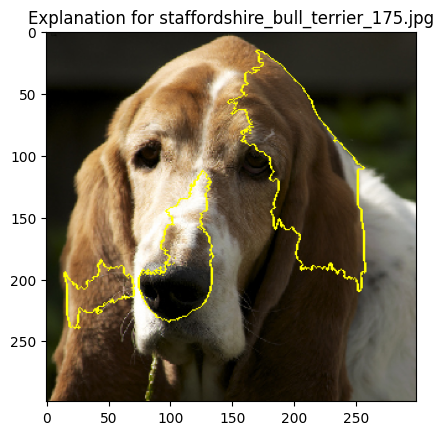

In [45]:
plt.figure()
plt.title(f'Explanation for {img_path}')
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()